In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import datetime as dt
import numpy.polynomial.polynomial as poly
%load_ext google.colab.data_table

In [ ]:
df_energy = pd.read_csv("/content/drive/MyDrive/Datasets/Final - Q1/levelized-cost-of-energy.csv")
df_energy.drop(columns=["Code"], inplace= True)
df_energy.columns = ['Entity', 'Year', 'Bioenergy', 'Geothermal', 'Offshore wind', "Solar photovoltaic", "Concentrated solar power", "Hydropower", "Onshore wind"]

select_world = df_energy['Entity'] == "World"
df_energy = df_energy[select_world]
select_year = df_energy["Year"] > 2009
df_energy_2010 = df_energy[select_year]
df_energy_2010

column_headers = list(df_energy_2010.columns.values)
column_headers[2:]

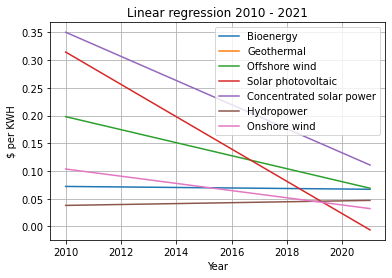

In [8]:
import numpy.polynomial.polynomial as poly

data = column_headers[2:]
for elem in data:
  a = df_energy_2010["Year"]
  b = df_energy_2010[elem]

  try:

    coefs = poly.polyfit(a, b, 1)
    ffit = poly.polyval(a, coefs)
    plt.plot(a, ffit, label=elem)

  except ValueError as error:

      print(f"Could not plot linear regression line because:{error}") 

  plt.legend()
  plt.xlabel('Year')
  plt.ylabel('$ per KWH') 
  plt.grid()
  plt.title('Linear regression 2010 - 2021')

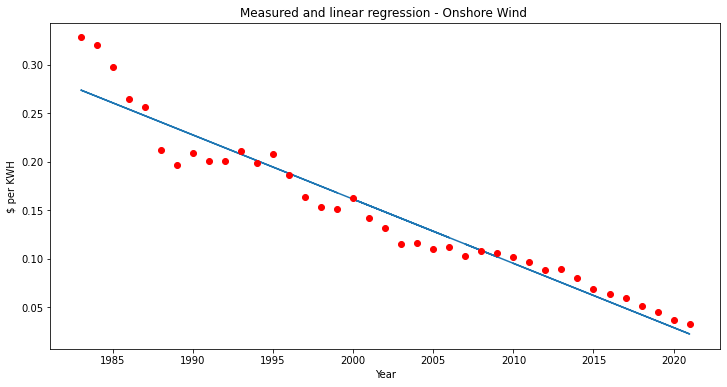

In [11]:
X = df_energy["Year"]
y = df_energy["Onshore wind"]

xmean = np.mean(X)
ymean = np.mean(y)

df_energy['xycov'] = (df_energy['Year'] - xmean) * (df_energy['Onshore wind'] - ymean)
df_energy['xvar'] = (df_energy['Year'] - xmean)**2
beta = df_energy['xycov'].sum() / df_energy['xvar'].sum()
alpha = ymean - (beta * xmean)

ypred = alpha + beta * X
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)    
plt.plot(X, y, 'ro')   
plt.title('Measured and linear regression - Onshore Wind ')
plt.xlabel('Year')
plt.ylabel('$ per KWH')

plt.show()

In [17]:
def get_prediction_calculator(df, column):

  x = df["Year"]
  y = df[column]

  xmean = np.mean(x)
  ymean = np.mean(y)
  xycov = (df['Year'] - xmean) * (df[column] - ymean)
  xvar = (df['Year'] - xmean)**2
  beta = xycov.sum() / xvar.sum()
  alpha = ymean - (beta * xmean)
  return alpha, beta

def get_predicted_value(years, alpha, beta):
  list_values = []
  for year in years:
    list_values.append(alpha + beta * year)
  return list_values

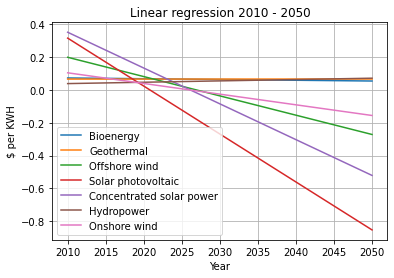

In [16]:
column_headers = list(df_energy_2010.columns.values)
years = [2010, 2022, 2023, 2024, 2025, 2030, 2035, 2040, 2050]
x = years
data = column_headers[2:9]
for elem in data:
  y_alpha = get_prediction_calculator(df_energy_2010, elem)[0]
  y_beta = get_prediction_calculator(df_energy_2010, elem)[1]
  y = get_predicted_value(x, y_alpha, y_beta)
  
  plt.plot(x, y, label=elem)
  plt.legend()
  plt.xlabel('Year')
  plt.ylabel('$ per KWH') 
  plt.grid()
  plt.title('Linear regression 2010 - 2050')
